In [2]:
import networkx as nx
import pandas as pd

from fair_cc_functions import *
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def stats(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes())
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    for j in range(iteration):
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

# def mins(n, unfair_graph, iteration=10):
#     unfair_mins, fair_mins = [], []
#     for i in range(4,n+1, 2):
#         unfair_min, fair_min = np.inf, np.inf
#         # generate fair graph (different matchings for one graph)
#         fairlets = create_fairlets(unfair_graph)
#         fair_graph = nx.Graph()
#         fair_graph.add_nodes_from(fairlets)
#         fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
#         fair_graph.add_weighted_edges_from(fair_p)
#         fair_graph.add_weighted_edges_from(fair_m)
#         for j in range(4*iteration):
#             if unfair_min==0 and fair_min==0: break
#             # compute unfair cluster and calculate costs
#             unfair_cluster = cc_pivot(unfair_graph)
#             unfair_costs = cost(unfair_cluster, unfair_graph)
#             if unfair_costs < unfair_min: unfair_min = unfair_costs
#             # compute fair cluster and calculate costs
#             fair_cluster = cc_pivot(fair_graph)
#             fair_costs = cost(fair_cluster, unfair_graph)
#             if fair_costs < fair_min: fair_min = fair_costs
#         unfair_mins.append(unfair_min)
#         fair_mins.append(fair_min)
#         #print(str(i/n) + '%')
#     return unfair_mins, fair_mins

In [10]:
# stats for scenario 1
# always same costs as already optimal
res = []
for i in range(4, 50, 2):
    unfair_graph = generate_complete_graph(i)
    stat_res = stats(unfair_graph, 1)
    res.append(stat_res)
nodes = [i for i in range(4, 50, 2)]
max_calc_cost = [i*i/4 for i in nodes]

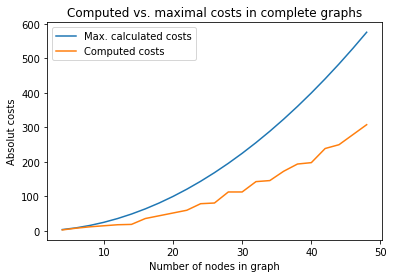

In [16]:
plt.plot(nodes, max_calc_cost, label='Max. calculated costs')
plt.plot(nodes, res, label='Computed costs')
plt.ylabel('Absolut costs')
plt.xlabel('Number of nodes in graph')
plt.title('Computed vs. maximal costs in complete graphs')
plt.legend()
plt.savefig('../comp_vs_calc_cost_complete_graph.png')
plt.savefig('CompleteGraphs/comp_vs_calc_cost_complete_graph.png')
plt.show()

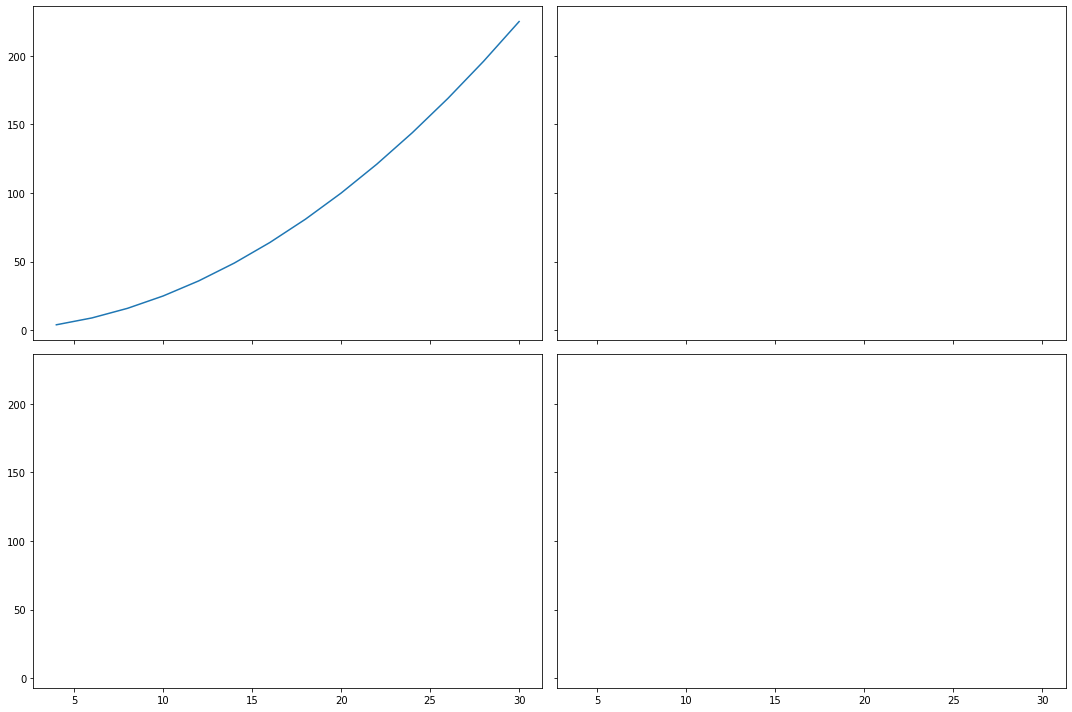

In [3]:
# # plot for complete graphs (scenario 1)
# amt_nodes = [i for i in range(4,nodes+1,2)]
# max_calc_cost = [i*i/4 for i in amt_nodes]
#
# # note:
# # no use of the same graphs in max and mean!!
# fig, ax = plt.subplots(2,2, figsize=(15,10), sharex=True, sharey=True)
#
# plt.title("Costs of complete graphs")
# ax[0][0].plot(amt_nodes, max_calc_cost, label='Max. calculated costs')
# ax[0][0].plot(amt_nodes, max_cost, label='Max. found costs')
# ax[0][0].plot(amt_nodes, min_cost, label='Min. found costs')
# ax[0][0].plot(amt_nodes, mean_cost, label='Mean costs')
#
# #fig.savefig("Plots.png")
# plt.tight_layout()
#
#
# plt.show()
# #print(min(max_incomp_dif))
# #print(max(max_incomp_dif))